In [1]:
# IMPORTANCIÓN DE LIBRERIAS
import pandas as pd
import numpy as np 
from pandas import read_csv
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [2]:
# ASIGNAMOS EL DATASET A NUESTRA VARIABLE
datos = pd.read_csv(filepath_or_buffer = "/Users/Ana/Evaluacion2/breast-cancer.csv")

In [3]:
# PRINT DE LOS DATOS
datos

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
# OBTENEMOS LA INFORMACIÓN DEL DATASET Y LO MOSTRAMOS SIN LAS ETIQUETAS DE LAS FILAS Y COLUMNAS
data = datos.values
data

array([[842302, 'M', 17.99, ..., 0.2654, 0.4601, 0.1189],
       [842517, 'M', 20.57, ..., 0.186, 0.275, 0.08902],
       [84300903, 'M', 19.69, ..., 0.243, 0.3613, 0.08758],
       ...,
       [926954, 'M', 16.6, ..., 0.1418, 0.2218, 0.0782],
       [927241, 'M', 20.6, ..., 0.265, 0.4087, 0.124],
       [92751, 'B', 7.76, ..., 0.0, 0.2871, 0.07039]], dtype=object)

In [5]:
# DIVIDIMOS EL DATASET EN 2 VARIABLES. X=TODAS LAS COLUMNAS, MENOS LA SEGUNDA (VARIABLES INDEPENDIENTES), y=SOLO LA SEGUNDA (VARIABLE DEPENDIENTE)
X = np.hstack((data[:, :1], data[:, 2:]))  # COMBINAMOS LAS COLUMNAS ANTES Y DESPUES DE LA VARIABLE A PREDECIR
y = data[:, 1]

In [6]:
# IMPRIMIMOS LA CANTIDAD DE DATOS DIVIDIDOS EN NUESTRAS VARIABLES
print(X.shape, y.shape)

(569, 31) (569,)


In [7]:
# IMPRIMIMOS LA INFORMACIÓN DE NUESTROS DATOS DIVIDIDOS SIN LAS ETIQUETAS DE FILAS Y COLUMNAS
X

array([[842302, 17.99, 10.38, ..., 0.2654, 0.4601, 0.1189],
       [842517, 20.57, 17.77, ..., 0.186, 0.275, 0.08902],
       [84300903, 19.69, 21.25, ..., 0.243, 0.3613, 0.08758],
       ...,
       [926954, 16.6, 28.08, ..., 0.1418, 0.2218, 0.0782],
       [927241, 20.6, 29.33, ..., 0.265, 0.4087, 0.124],
       [92751, 7.76, 24.54, ..., 0.0, 0.2871, 0.07039]], dtype=object)

In [8]:
# IMPRIMIMOS LA INFORMACIÓN DE NUESTROS DATOS DIVIDIDOS SIN LAS ETIQUETAS DE FILAS Y COLUMNAS
y

array(['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M

In [9]:
# SE DEFINEN DATOS DE PRUEBA Y ENNTRENAMIENTO 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
# SE DEFINE EL MODELO
modelo = DecisionTreeClassifier()

In [11]:
# SE ENTRENA EL MODELO
modelo.fit(X_train,y_train)

DecisionTreeClassifier()

In [12]:
# SE HACEN LAS PREDICCIONES PARA LOS DATOS DE PRUEBA, Y SE CALCULA E IMPRIME LA PRESICIÓN COMPARANDO LOS DATOS REALES CON LOS PREDICHOS
predicciones = modelo.predict(X_test)
print(accuracy_score(y_test, predicciones))

0.9736842105263158


In [13]:
# SE MUESTRA UNA MATRIZ DE CONFUSIÓN DE LOS DATOS REALES VS PREDICHOS
print(confusion_matrix(y_test, predicciones))

[[70  2]
 [ 1 41]]


In [14]:
# DEFINIMOS NUESTRAS ITERACIONES PARA LA EVALUACION
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [15]:
# DEFINIMOS EL ESPACIO DE BUSQUEDA
space = dict()
space['criterion'] = ['gini','entropy']
space['max_depth'] = [3, 5, 7, 10, 15]
space['min_samples_leaf'] = [3, 5, 10, 15, 20]
space['min_samples_split'] = [8, 10, 12, 18, 20, 16]

In [16]:
# DEFINIMOS LA BUSQUEDA
search = RandomizedSearchCV(
    modelo,
    space,
    scoring='accuracy',
    n_jobs=-1,
    cv=cv
)
# EJECUTAMOS LA BUSQUEDA
result = search.fit(X_train, y_train)

In [25]:
# MOSTRAMOS LOS RESULTADOS
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.9217391304347827
Best Hyperparameters: {'min_samples_split': 10, 'min_samples_leaf': 5, 'max_depth': 15, 'criterion': 'gini'}


In [26]:
# OPTIMIZAMOS EL MODELO
modelo = DecisionTreeClassifier(max_depth= 15, min_samples_leaf= 5, criterion= 'gini', min_samples_split = 10)

In [27]:
# RE-ENNTRENAMOS CON LOS DATOS DE ENTRENAMIENTO
modelo.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=15, min_samples_leaf=5, min_samples_split=10)

In [28]:
# SE HACEN NUEVAS PREDICCIONES PARA LOS DATOS DE PRUEBA, Y SE CALCULA E IMPRIME LA PRESICIÓN COMPARANDO LOS DATOS REALES CON LOS PREDICHOS
predicciones2 = modelo.predict(X_test)
print(accuracy_score(y_test, predicciones2))

0.9473684210526315


In [29]:
# RE-IMPRIMIMOS LA MATRIZ DE CONFUSION CON LAS NUEVAS PREDICCIONES
print(confusion_matrix(y_test, predicciones2))

[[69  3]
 [ 3 39]]


In [30]:
# MOSTRAR INFORME DE CLASIFICACIÓN
print(classification_report(y_test, predicciones2))

              precision    recall  f1-score   support

           B       0.96      0.96      0.96        72
           M       0.93      0.93      0.93        42

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [31]:
# CONVERTIMOS LOS VALORES "B" Y "M" A 0 Y 1 PARA LA GRÁFICA
y_test_numeric = np.where(y_test == 'B', 0, 1)
y_test_numeric

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0])

In [32]:
# GENERAMOS Y ENTRENAMOS UN NUEVO MODELO (SIN OPTIMIZAR) PARA COMPARAR
modelo_original = DecisionTreeClassifier()
modelo_original.fit(X_train, y_train)

DecisionTreeClassifier()

In [33]:
# GENERAMOS Y ASIGNAMOS PROBABILIDAD A LA CLASE POSITIVA 1 DE AMBOS MODELOS
y_probs_original = modelo.predict_proba(X_test)[:, 1]
y_probs_before = modelo_original.predict_proba(X_test)[:, 1]

In [34]:
# CALCULAMOS CURVA ROC PARA AMBOS MODELOS
fpr_original, tpr_original, thresholds_original = roc_curve(y_test_numeric, y_probs_before, pos_label=1)
roc_auc_original = auc(fpr_original, tpr_original)

fpr_optimized, tpr_optimized, thresholds_optimized = roc_curve(y_test_numeric, y_probs_original, pos_label=1)
roc_auc_optimized = auc(fpr_optimized, tpr_optimized)

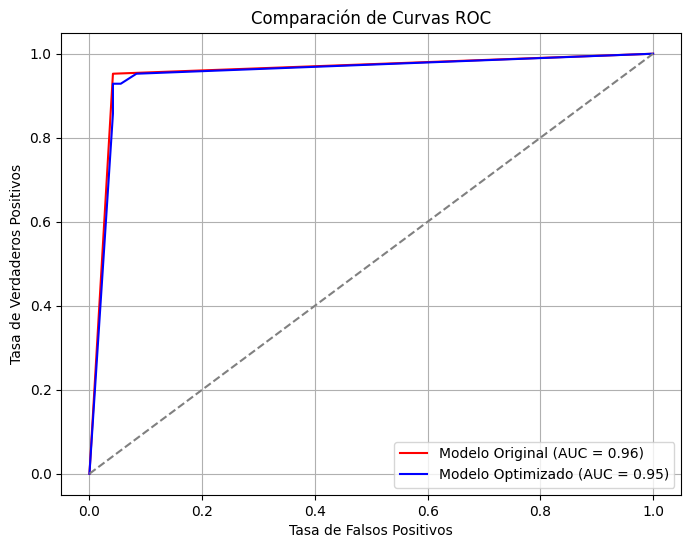

In [35]:
# GRAFICAMOS AMBAS CURVAS ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_original, tpr_original, color='red', label=f'Modelo Original (AUC = {roc_auc_original:.2f})')
plt.plot(fpr_optimized, tpr_optimized, color='blue', label=f'Modelo Optimizado (AUC = {roc_auc_optimized:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Línea de aleatoriedad
plt.title('Comparación de Curvas ROC')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()